In [13]:
import warnings;
warnings.simplefilter('ignore')

# 0. Install and Import Deps

In [14]:
!pip3 install pystan==2.19.1.1 fbprophet

In [15]:
import pandas as pd
from fbprophet import Prophet

# 1. Read in Data and Process Dates

In [16]:
df = pd.read_csv('dataset.csv')

In [18]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [19]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [20]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [21]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [22]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [24]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [25]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [27]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

KeyError: "['Time Date' 'Product' 'Store' 'Year' 'Month' 'Day'] not found in axis"

In [28]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# 2. Train Model

In [29]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

Initial log joint probability = -33.1653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       1945.54   0.000409428       137.544    4.27e-06       0.001      114  LS failed, Hessian reset 
      99       1946.02    0.00051061       86.4168           1           1      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       1946.15   0.000797427       127.177   9.132e-06       0.001      222  LS failed, Hessian reset 
     197        1946.2   2.62356e-05       65.8608   3.961e-07       0.001      364  LS failed, Hessian reset 
     199        1946.2   4.49997e-06       59.9822      0.5508      0.5508      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258        1946.2   2.30551e-07       45.2252      0.8962      0.8962      439   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

# 3. Forecast Away

In [30]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3046.999054,875.073769,4006.584906,3046.999054,3046.999054,-624.031580,-624.031580,-624.031580,488.234491,...,16.574517,16.574517,16.574517,-1128.840588,-1128.840588,-1128.840588,0.0,0.0,0.0,2422.967474
1,2018-01-02,3047.573430,814.136528,4001.519283,3047.573430,3047.573430,-634.537113,-634.537113,-634.537113,488.234491,...,-11.319356,-11.319356,-11.319356,-1111.452248,-1111.452248,-1111.452248,0.0,0.0,0.0,2413.036317
2,2018-01-03,3048.147805,674.281121,4009.389043,3048.147805,3048.147805,-609.074121,-609.074121,-609.074121,488.234491,...,-4.438156,-4.438156,-4.438156,-1092.870456,-1092.870456,-1092.870456,0.0,0.0,0.0,2439.073684
3,2018-01-04,3048.722181,837.836410,4109.336397,3048.722181,3048.722181,-562.422146,-562.422146,-562.422146,488.234491,...,22.510201,22.510201,22.510201,-1073.166838,-1073.166838,-1073.166838,0.0,0.0,0.0,2486.300035
4,2018-01-05,3049.296556,853.966040,4075.942776,3049.296556,3049.296556,-598.775077,-598.775077,-598.775077,488.234491,...,-34.543559,-34.543559,-34.543559,-1052.466009,-1052.466009,-1052.466009,0.0,0.0,0.0,2450.521479


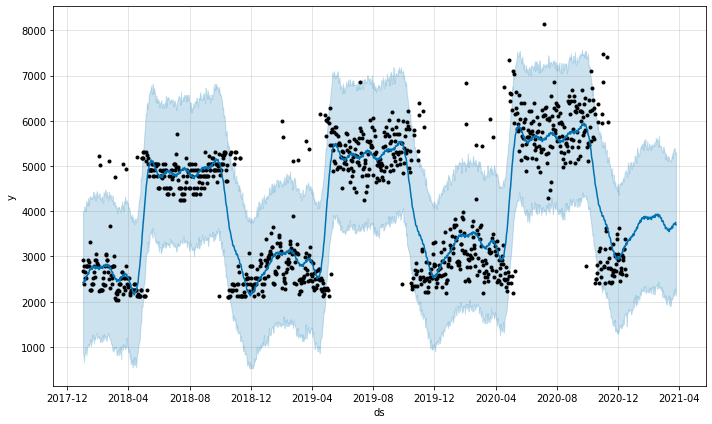

In [31]:
plot1 = m.plot(forecast)

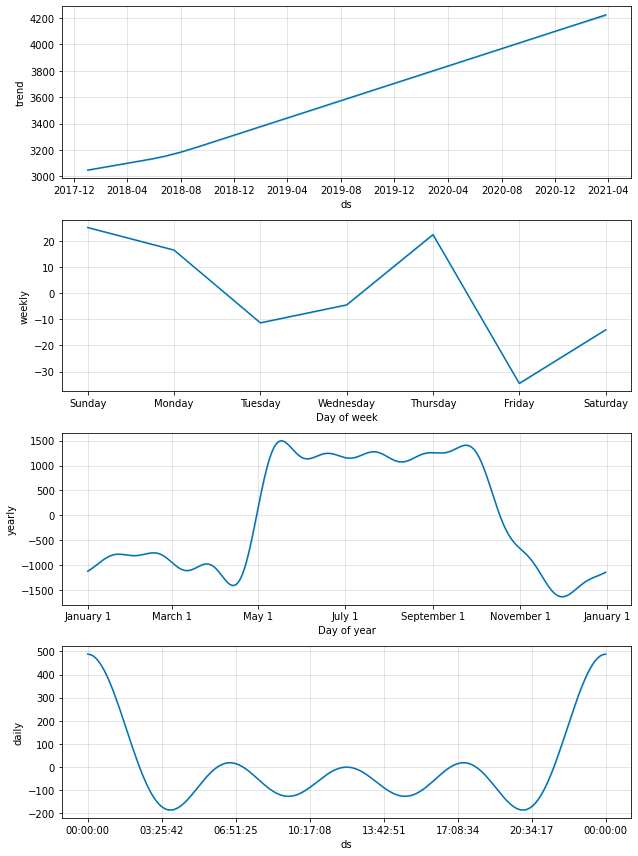

In [32]:
plot2 = m.plot_components(forecast)